# Life history trade-offs: Antibiotic Resistance and Vaccination

## SIR Model without birth rate or death rate

#### followed closely after the tutorial from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ and http://web.pdx.edu/~gjay/teaching/mth271_2020/html/09_SEIR_model.html 

for the entity of this simulation we will assume the same population size $N$ and the same starting conditions for $S_0$, $I_0$ and $R_0$. The rest of the parameters varies from case to case.

In [1]:
#imports

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, interactive, interact_manual, fixed
import ipywidgets as widgets
from ipywidgets import FloatSlider

The simple SIR model we employ here is formulated using the following ODEs

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I\\
\frac{dI}{dt} &= \beta S I - \gamma I\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

For this model we can calculate the equilibrium solutions, so setting the time derivative to zero

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions:
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= C\\
I_f &= 0\\
R_f &= C
\end{aligned}
$$

* endemic solution (not done yet)
$$
\begin{aligned}
S_e &= \frac{\gamma}{\beta}\\
I_e &= 0\\
R_e &= C
\end{aligned}
$$


The parameter values were taken from Lehtinen 2018 and Colijn 2009

In [2]:
#initialising variables

#total population size
N = 1000 

#prior immune and recovered
I0, R0 = 1, 0

#prior susceptible
S0 = N - I0 - R0

#contact rate beta and recovery rate gamma
beta, gamma = 1/N, 1./10

#interval to plot
t = 160

In [3]:
#PRE: all variables are positive integers
#POST: The SIR model

def SIR (t, y, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I 
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [4]:
#initial vector
y0 = S0, I0, R0

#numerically integrate the ODEs using Runge Kutta Method
sol = solve_ivp(SIR, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma))

### Plotting the Result

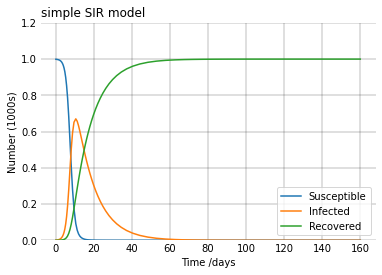

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected', 'Recovered'])
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('simple SIR model', loc='left')
plt.show()


## SIR model with death rates and birth rates

The SIR model using birth and death rates we employ here is formulated using the following ODEs. This model was introduced in the infectious disease dynamics script at ETH

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I\\
\frac{dR}{dt} &= \gamma I - \delta_R R
\end{aligned}
$$

For this case we can calculate the equilibrium solutions so where the time derivative equals zero

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I - \delta_R R \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= \frac{\Lambda}{\delta_S}\\
I_f &= 0\\
R_f &= 0
\end{aligned}
$$

* endemic solution
$$
\begin{aligned}
S_e &= \frac{\delta_I + \gamma}{\beta}\\
I_e &= \frac{\Lambda}{\delta_I + \gamma} - \frac{\delta_S}{\beta}\\
R_e &= \frac{\gamma}{\delta_R}\left(\frac{\Lambda}{\delta_I+\gamma}-\frac{\delta_S}{\beta}\right)
\end{aligned}
$$

In [6]:
#adding birth and death rates to the simple SIR model

#parameters given above
beta = 1/N
gamma = 0.1

#parameters to be added
Lambda = 0.5
deltaS = 0.01
deltaI = 0.1
deltaR = 0.01

In [7]:
#PRE: all variables are positive integers
#POST: The SIR model with death rates

def SIRcomplex (t, y, N, beta, gamma, Lambda, deltaS, deltaI, deltaR):
    S, I, R = y
    dSdt = Lambda - deltaS * S - beta * S * I
    dIdt = beta * S * I  - deltaI * I - gamma * I
    dRdt = gamma * I - deltaR * R

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [8]:
#numerically integrate the ODEs
sol = solve_ivp(SIRcomplex, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, Lambda, deltaS, deltaI, deltaR))

### Plotting the results

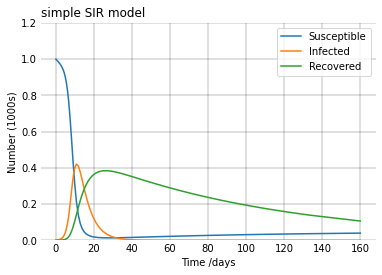

In [9]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected', 'Recovered'])
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('simple SIR model', loc='left')
plt.show()